# Least squares face-off

In the following lines, use your own integer to seed the random number generator.

In [1]:
using Random
Random.seed!(3383)  # CHANGE ME
@show poses = shuffle(1:10)[1:5];
@show subjects = shuffle(1:40)[1:20];

poses = (shuffle(1:10))[1:5] = [5, 7, 9, 4, 10]
subjects = (shuffle(1:40))[1:20] = [4, 33, 22, 8, 16, 20, 36, 14, 39, 40, 37, 26, 3, 31, 27, 2, 34, 23, 21, 11]


The following block will read in images for all the selected poses and subjects. You may need to change the directory in the argument to `imread`. Use `pwd()` to see Julia's working directory, and `cd` to change it.  

In [2]:
using PyPlot, LinearAlgebra
npo = length(poses);
nsub = length(subjects);
A = zeros(112*92,npo*nsub);  
j = 1
for (i1,s) in enumerate(subjects)
  for (i2,p) in enumerate(poses)
        X = imread("../attfaces/s$s/$p.png")
        A[:,j] = vec(X)
        j += 1
  end
end
@show size(A)

size(A) = (10304, 100)


(10304, 100)

Each column of `A` is a vectorized $112\times 92$ array of pixel gray levels. Here is a little function that makes it easy to reshape and plot any such image vector.

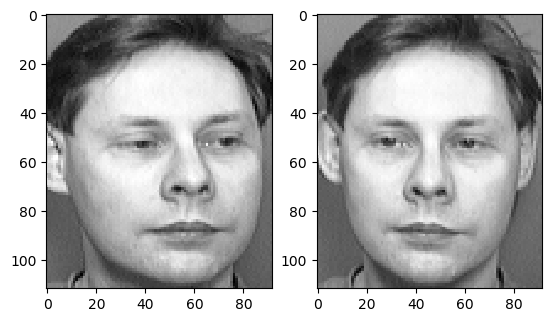

In [3]:
showface(x) = imshow(reshape(x,112,92),cmap="gray")
subplot(121), showface(A[:,1]);
subplot(122), showface(A[:,2]);

* Use the following block to find and plot the "average face" from the dataset.

## SVD

The left singular vectors of $A$ are known in the literature as "eigenfaces". One can compress the dataset if the singular values decay rapidly enough. 

* In the following block, compute a **thin** SVD of $A$ and make a `semilogy` plot of the singular values.

The first singular value really stands out. Let's look at the leading eigenface.

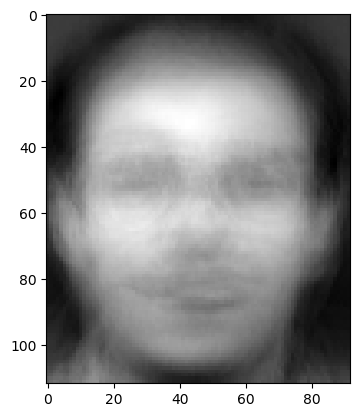

In [12]:
showface(-U[:,1]);

This is essentially the average face again. (You may have to change the sign of the vector to see it properly.)

* In the following block, plot the next 3 eigenfaces side by side. They should be roughly facelike.

## Least squares approximation

Here is a *very* primitive facial recognition algorithm. Given a new image, find its least-squares approximation using the data set. Take a norm of all coefficients that belong to one subject at a time. The subject with the largest norm is the identity. 

Let's import an image from one of the unused poses of a selected subject. 

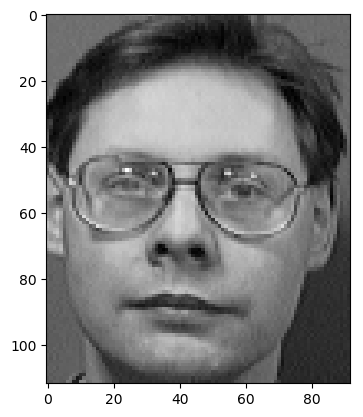

In [8]:
p = setdiff(1:10,poses)[1]  # new pose
B = imread("../attfaces/s$(subjects[1])/$p.png")
b = vec(B);
showface(b);

* In the following block, solve the least squares problem $Ax\approx b$ for $x$. On one graph, plot the coefficients in $x$ corresponding to the selected subject in one color, and the rest of the coefficients in another color.

* In the following block, take the 1-norm of the coefficient subvector corresponding to each of the 20 subjects. Does the algorithm get the ID right? 

* Using only the columns of $A$ corresponding to the correct subject, plot the linear combination that best approximates the "new" face $b$. (In other words, the projection of $b$ onto the space spanned by those columns.) 